In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\admin\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
fashion_train_df= pd.read_csv('fashion-mnist_train.csv')

In [3]:
fashion_test_df = pd.read_csv('fashion-mnist_test.csv')

In [4]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
fashion_train_df.shape

(60000, 785)

In [7]:
fashion_test_df.shape

(10000, 785)

In [8]:
print(set(fashion_train_df['label']))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [9]:
training = np.array(fashion_train_df,dtype='float32')
testing = np.array(fashion_test_df,dtype='float32')

In [10]:
training.shape

(60000, 785)

In [11]:
import random

0.0

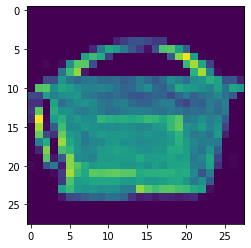

In [12]:
i = random.randint(0,60001) 
plt.imshow(training[i,1:].reshape(28,28)) 
label = training[i,1] 
label

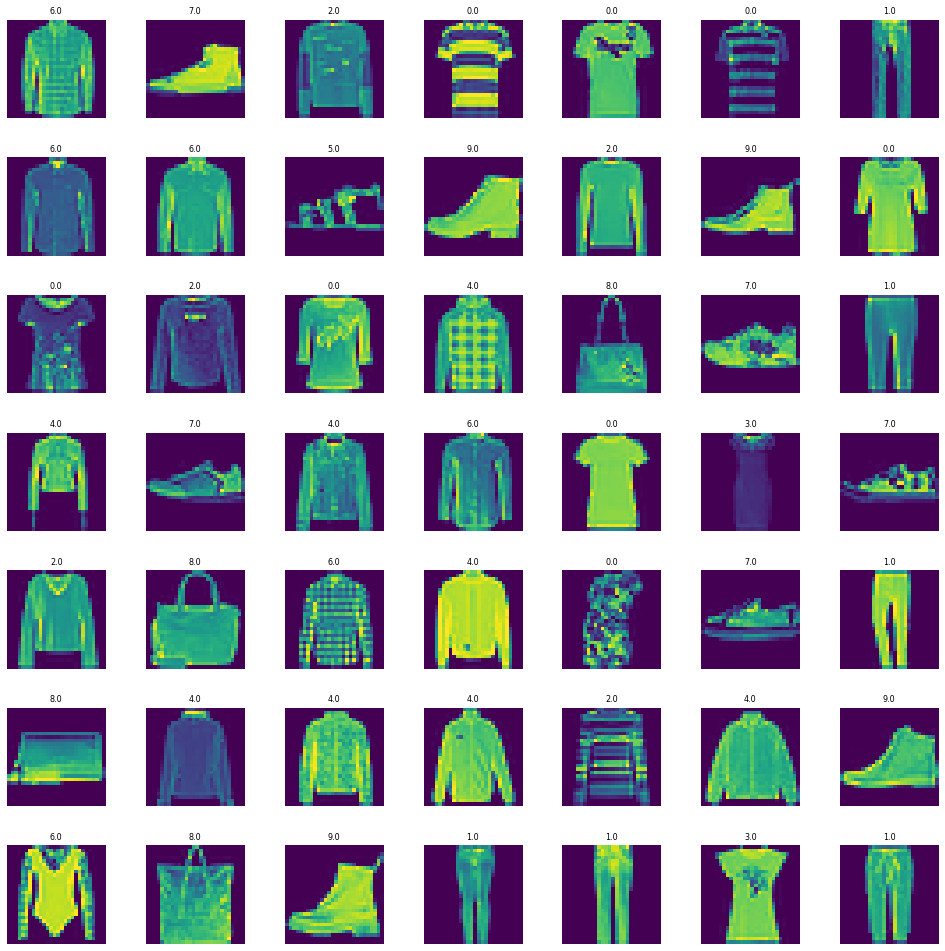

In [13]:
W_grid = 7
L_grid = 7

fig,axes = plt.subplots(L_grid,W_grid,figsize =(17,17))

axes = axes.ravel() 
n_training = len(training) 



for i in np.arange(0,W_grid*L_grid):
        index = np.random.randint(0,n_training)
        axes[i].imshow(training[index,1:].reshape((28,28)))
        axes[i].set_title(training[index,0],fontsize = 8)
        axes[i].axis('off')
        
plt.subplots_adjust(hspace=0.4)  

In [14]:
X_train = training[:,1:]/255
y_train = training[:,0]
X_test = testing[:,1:]/255
y_test = testing[:,0]

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train,test_size = 0.2,random_state = 12345) 

In [16]:
X_train = X_train.reshape(X_train.shape[0],*(28,28,1))
X_test = X_test.reshape(X_test.shape[0],*(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0],*(28,28,1))

In [17]:
X_train.shape

(48000, 28, 28, 1)

In [18]:
X_test.shape

(10000, 28, 28, 1)

In [19]:
X_validate.shape

(12000, 28, 28, 1)

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [21]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32,3,3,input_shape = (28,28,1),activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size= (2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(32,activation = 'relu'))
cnn_model.add(Dense(10,activation = 'sigmoid'))
cnn_model.compile(loss ='sparse_categorical_crossentropy',optimizer = Adam(learning_rate=0.001),metrics= ['accuracy'])

In [22]:
cnn_model.fit(X_train,y_train,batch_size =512,epochs = 10,verbose = 1,validation_data = (X_validate,y_validate) )

Epoch 1/10
94/94 [==============================] - 4s 31ms/step - loss: 1.4988 - accuracy: 0.5125 - val_loss: 0.8890 - val_accuracy: 0.6931
Epoch 2/10
94/94 [==============================] - 3s 28ms/step - loss: 0.7602 - accuracy: 0.7308 - val_loss: 0.6782 - val_accuracy: 0.7555
Epoch 3/10
94/94 [==============================] - 3s 36ms/step - loss: 0.6408 - accuracy: 0.7667 - val_loss: 0.6082 - val_accuracy: 0.7772
Epoch 4/10
94/94 [==============================] - 3s 33ms/step - loss: 0.5849 - accuracy: 0.7866 - val_loss: 0.5660 - val_accuracy: 0.7982
Epoch 5/10
94/94 [==============================] - 3s 35ms/step - loss: 0.5476 - accuracy: 0.8001 - val_loss: 0.5344 - val_accuracy: 0.8073
Epoch 6/10
94/94 [==============================] - 3s 32ms/step - loss: 0.5195 - accuracy: 0.8110 - val_loss: 0.5142 - val_accuracy: 0.8170
Epoch 7/10
94/94 [==============================] - 3s 32ms/step - loss: 0.5028 - accuracy: 0.8176 - val_loss: 0.4985 - val_accuracy: 0.8232
Epoch 8/10
94

In [23]:
evaluation = cnn_model.evaluate(X_test,y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.4588 - accuracy: 0.8304
Test Accuracy : 0.830


In [24]:
predicted_classes = np.argmax(cnn_model.predict(X_test),axis=-1)

313/313 [==============================] - 2s 4ms/step


In [25]:
predicted_classes

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

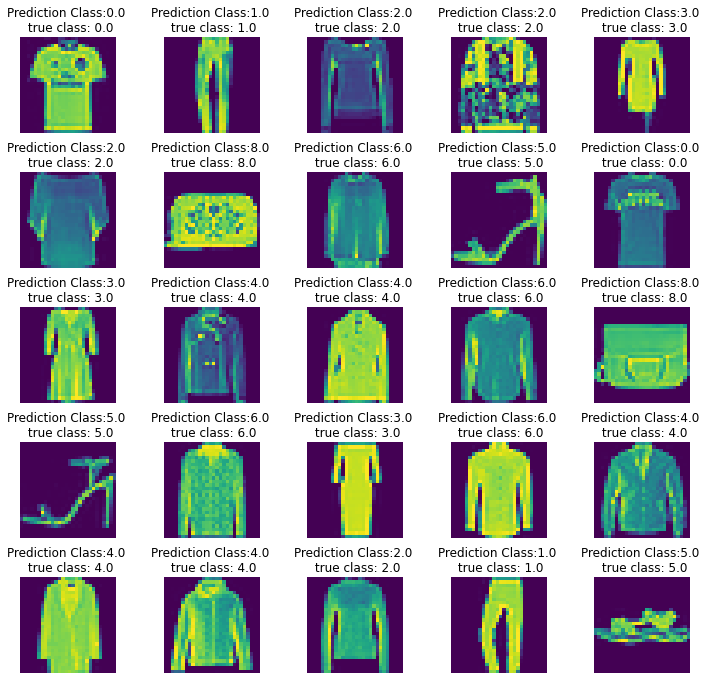

In [26]:
L = 5
W = 5

fig,axes = plt.subplots(L,W,figsize = (12,12))
axes = axes.ravel()
for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title('Prediction Class:{1} \n true class: {1}'.format(predicted_classes[i],y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 0.5) 

In [27]:
from sklearn.metrics import classification_report

classes = 10
targets = ["Class {}".format(i) for i in range(classes)]
print(classification_report(y_test, predicted_classes, target_names = targets))

              precision    recall  f1-score   support

     Class 0       0.79      0.78      0.79      1000
     Class 1       0.95      0.96      0.96      1000
     Class 2       0.81      0.63      0.71      1000
     Class 3       0.86      0.85      0.85      1000
     Class 4       0.74      0.75      0.75      1000
     Class 5       0.94      0.91      0.93      1000
     Class 6       0.52      0.63      0.57      1000
     Class 7       0.87      0.91      0.89      1000
     Class 8       0.95      0.95      0.95      1000
     Class 9       0.93      0.93      0.93      1000

    accuracy                           0.83     10000
   macro avg       0.84      0.83      0.83     10000
weighted avg       0.84      0.83      0.83     10000

